<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

## Plan
- imports x
- load amazon data into df x
- clean names? 
- tokenize: 
	- review x
	- reviewer name?
	- title?

- Gensim LDA Topic Modle x

## pre-process
	- create a dicitonary representation x
	- remove extreme values x
	- create a BOW representation of corpus x
## fit LDA x
	- return topics / words x
		- find correct # of topics x
	- visualize x
	-conclusions x

In [1]:
#Imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import gensim
import os
import re

from gensim.utils import smart_open, simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [2]:
path = 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'

df = pd.read_csv(path)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
# regex cleaning

r_cleaning = ['categories', 'brand', 'name', 'reviews.text', 'reviews.title', 'reviews.username' ]

def regex_clean(dataframe, target_list):
    
    for target in target_list:
        dataframe[target].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
                                

In [9]:
#tokenize reviews
regex_clean(df, r_cleaning)

#remove stopwords
import spacy
nlp = spacy.load('en_core_web_lg')

def lemmatize(text):
    doc = nlp(text)
    lemmas = []
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_)
    return lemmas

df['lemmas'] = df['reviews.text'].apply(lemmatize)

## Gemma LDA

In [12]:
# A Dictionary Representation of all the words in our corpus of reviews
reviews2word = corpora.Dictionary(df['lemmas'])

In [13]:
#remove extreme values from the dataset
reviews2word.filter_extremes(no_below=10, no_above=0.75)
len(reviews2word.keys())

2036

In [15]:
# now we create our corpus upon which we will apply the lda
reviews_corpus = [reviews2word.doc2bow(text) for text in df['lemmas']]

In [30]:
# find most coherent number of topics
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = path
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=reviews2word, 
                                                        corpus=reviews_corpus, 
                                                        path=df['lemmas'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=4)


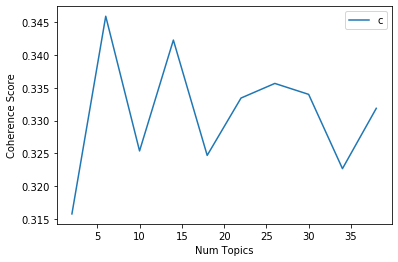

In [33]:
import matplotlib.pyplot as plt

#graph of coherence
limit = 40; start = 2; step = 4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(("coherence_values"), loc='best1')
plt.show()

In [34]:
# this shows me that the ideal number of topics should be ~ 7
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3158
Num Topics = 6  has Coherence Value of 0.3459
Num Topics = 10  has Coherence Value of 0.3254
Num Topics = 14  has Coherence Value of 0.3422
Num Topics = 18  has Coherence Value of 0.3247
Num Topics = 22  has Coherence Value of 0.3334
Num Topics = 26  has Coherence Value of 0.3356
Num Topics = 30  has Coherence Value of 0.334
Num Topics = 34  has Coherence Value of 0.3227
Num Topics = 38  has Coherence Value of 0.3319


In [35]:
# latent dirchelle model 
lda = LdaMulticore(corpus=reviews_corpus,
                   id2word=reviews2word,
                   random_state=42,
                   num_topics = 7,
                   passes=10,
                   workers=4
                  )

In [36]:
# pretty print visualization of topics
# lda.print_topics()
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]
(topics)

['battery charge work buy time day week come month use',
 'love old buy year tablet use gift daughter easy purchase',
 'battery good price great work long brand buy Amazon life',
 'Amazon tablet great good nice device product easy quality Fire',
 'read book Kindle easy use screen tablet love kindle like',
 'great tablet kid price good product use easy child recommend',
 'app tablet case like good kid use buy play game']

In [41]:
# visualize topics
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [42]:
pyLDAvis.gensim.prepare(lda, reviews_corpus, reviews2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.237722 -0.121559       1        1  21.601641
4     -0.115234  0.026042       2        1  15.986440
1     -0.170783  0.112014       3        1  15.411143
0      0.209511  0.180530       4        1  13.043923
6     -0.051623  0.065524       5        1  11.915961
3     -0.013997 -0.104301       6        1  11.291406
5     -0.095596 -0.158250       7        1  10.749485, topic_info=     Category         Freq       Term        Total  loglift  logprob
3     Default  9198.000000    battery  9198.000000  30.0000  30.0000
18    Default  8989.000000      great  8989.000000  29.0000  29.0000
79    Default  5877.000000       love  5877.000000  28.0000  28.0000
1589  Default  7614.000000     tablet  7614.000000  27.0000  27.0000
15    Default  5174.000000      price  5174.000000  26.0000  26.0000
161   Default  2938.000000        kid  2938.000000  25.0000  25.0000
439   Default  2460.000000        old  2460.000000  24.0000  24.0000
637   Default  2014.000000       read  2014.000000  23.0000  23.0000
16    Default  2044.000000      brand  2044.000000  22.0000  22.0000
959   Default  1827.000000       book  1827.000000  21.0000  21.0000
91    Default  2244.000000       year  2244.000000  20.0000  20.0000
1118  Default  2389.000000        app  2389.000000  19.0000  19.0000
29    Default  6978.000000       good  6978.000000  18.0000  18.0000
1718  Default  1692.000000     Kindle  1692.000000  17.0000  17.0000
20    Default  2615.000000       long  2615.000000  16.0000  16.0000
21    Default  3210.000000     Amazon  3210.000000  15.0000  15.0000
192   Default  1167.000000     charge  1167.000000  14.0000  14.0000
117   Default  1114.000000       gift  1114.000000  13.0000  13.0000
11    Default  2240.000000    product  2240.000000  12.0000  12.0000
28    Default  3262.000000       easy  3262.000000  11.0000  11.0000
800   Default   987.000000   daughter   987.000000  10.0000  10.0000
258   Default   853.000000       case   853.000000   9.0000   9.0000
24    Default   801.000000  Christmas   801.000000   8.0000   8.0000
1192  Default  1703.000000     screen  1703.000000   7.0000   7.0000
153   Default  1958.000000       game  1958.000000   6.0000   6.0000
166   Default   977.000000        son   977.000000   5.0000   5.0000
26    Default  5599.000000        buy  5599.000000   4.0000   4.0000
1429  Default  1350.000000     kindle  1350.000000   3.0000   3.0000
349   Default   961.000000      child   961.000000   2.0000   2.0000
338   Default   968.000000      value   968.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
758    Topic7   146.416672      young   262.099976   1.6480  -5.4276
675    Topic7   214.095612   friendly   424.564514   1.5457  -5.0477
15     Topic7  1664.740234      price  5174.531250   1.0962  -2.9967
143    Topic7   471.368042  recommend  1248.863770   1.2560  -4.2584
338    Topic7   367.781250      value   968.698425   1.2618  -4.5066
41     Topic7   391.402954    perfect  1075.705078   1.2193  -4.4443
151    Topic7   135.505005         ok   287.113159   1.4794  -5.5051
1683   Topic7    68.494804       mode   120.663048   1.6641  -6.1873
808    Topic7   170.729492       user   425.410522   1.3173  -5.2740
29     Topic7  1327.173950       good  6978.018555   0.5706  -3.2233
116    Topic7   209.241623    control   642.776184   1.1080  -5.0706
392    Topic7   131.631927     highly   345.599701   1.2650  -5.5341
916    Topic7    91.339653     parent   203.673340   1.4284  -5.8995
399    Topic7   261.822113     little   974.843018   0.9157  -4.8464
83     Topic7   760.359436        use  4801.450684   0.3874  -3.7803
28     Topic7   563.322693       easy  3262.186523   0.4740  -4.0802
1890   Topic7   149.151276   parental   430.374115   1.1706  -5.4091
67     Topic7   161.781296       beat   511.945740   1.0783  -5.3278
1388   Topic7   193.1

## Make a few inferences about the model

Topic 1 appears to relate to batteries

Topic 2 to the kindle fire

Topic 3 to gifts

Topic 2 overlaps with topic 5, which seems to be mostly about screen protectors and apps

I'm going to try to put these topics into the dataframe as a feature

In [48]:
# this is an attempt to do additional visualization
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [50]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=reviews_corpus, texts=df['lemmas'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.tail(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
28322,28322,5.0,0.9283,"great, tablet, kid, price, good, product, use,...","[product, awesome, kid, play, sort, use, stron..."
28323,28323,6.0,0.5189,"app, tablet, case, like, good, kid, use, buy, ...","[8, Fire, tablet, nexus, 7, tablet, add, benef..."
28324,28324,1.0,0.6113,"love, old, buy, year, tablet, use, gift, daugh...","[get, mom, check, facebook, get, computer, far..."
28325,28325,6.0,0.5705,"app, tablet, case, like, good, kid, use, buy, ...","[fast, good, lighting, get, 16, gb, space, goo..."
28326,28326,4.0,0.5070,"read, book, Kindle, easy, use, screen, tablet,...","[begin, good, clarity, love, size, storage, ca..."
28327,28327,1.0,0.8065,"love, old, buy, year, tablet, use, gift, daugh...","[get, 2, 8, yr, old, twin, 11, yr, old, well, ..."
28328,28328,1.0,0.8928,"love, old, buy, year, tablet, use, gift, daugh...","[buy, niece, Christmas, gift.she, 9, year, old..."
28329,28329,4.0,0.6709,"read, book, Kindle, easy, use, screen, tablet,...","[nice, light, internet, browsing, keep, email,..."
28330,28330,4.0,0.7774,"read, book, Kindle, easy, use, screen, tablet,...","[Tablet, absolutely, want, watch, tv, Shows, M..."
28331,28331,6.0,0.7240,"app, tablet, case, like, good, kid, use, buy, ...","[ninety, dollar, expectionation, low, good, ta..."


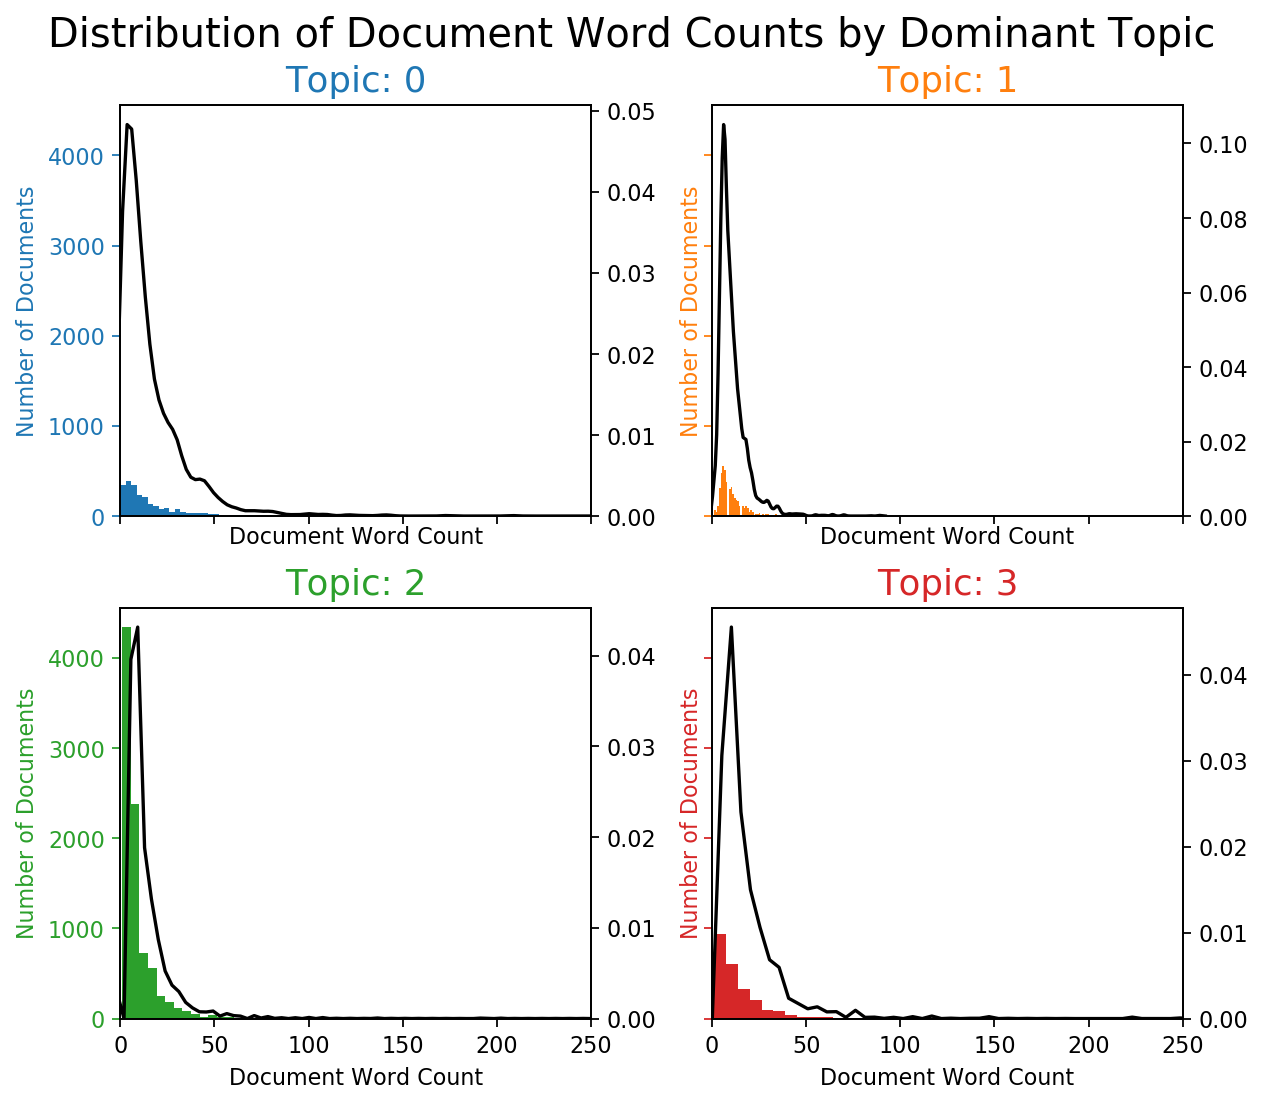

In [56]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(8,7), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 250), xlabel='Document Word Count')

    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=18)
plt.show()

In [39]:
# save lda model
from gensim.test.utils import datapath
lda.save('amazon-review-lda-model')

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling